Richter Jordaan Pset1

Question 1.1)

In [103]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [104]:
download(url, "covid_data.csv");

In [105]:
using Pkg   # built-in package manager in Julia: Pkg
Pkg.add("CSV")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [106]:
using CSV

In [107]:
data = CSV.read("covid_data.csv");

In [108]:
using Pkg
Pkg.add("DataFrames")
using DataFrames
rename!(data, 1 => "province", 2 => "country");

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [109]:
using Interact
all_countries = collect(data[:,2]);
unique_countries = unique(all_countries);

Question 1.2)

In [110]:
countries = ["China","Japan","Korea, South","US","United Kingdom","France","Germany"]
date_strings = String.(names(data))[5:end];

Question 1.3)

In [111]:
using Dates
format = Dates.DateFormat("m/d/Y")
dates = parse.(Date, date_strings, format) .+ Year(2000);

In [112]:
num_days = length(dates)

74

Question 1.4)

In [113]:
country_data = zeros(Int64,length(countries),num_days,); #create matrix representing counts for all countries
#add each country's daily count to that day's total with loop

In [114]:
for i in 1:length(countries)
    first_index = findfirst(all_countries .== countries[i])
    last_index = findlast(all_countries .== countries[i])
    for day in 1:num_days
        country_data[i,day] = sum(data[first_index:last_index,day+4])
    end
end

In [115]:
ticks = [1,10,100,1000,10000,100000,1000000]

7-element Array{Int64,1}:
       1
      10
     100
    1000
   10000
  100000
 1000000

Question 1.5)

In [116]:
using Plots

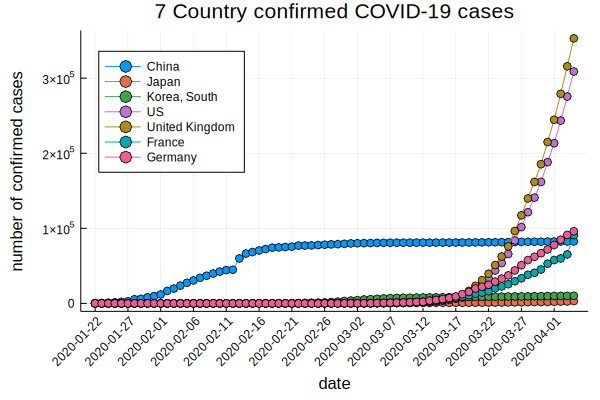

In [117]:
function custom_plot(dateRange,country_counts,plot, logscale=false)
    myPlot = plot
    plot!(xticks=dateRange[1:5:end], xrotation=45, leg=:topleft)
    xlabel!("date")
    ylabel!("number of confirmed cases")
    title!("7 Country confirmed COVID-19 cases")
    if logscale
        for i in 1:length(countries)
            plot!(dateRange,country_counts[i,:], label=countries[i], yscale=:log10, m=:o,ticks = [1,10,100,1000,10000,100000,1000000])
        end
    else
        for i in 1:length(countries)
            plot!(dateRange,country_counts[i,:], label=countries[i], m=:o)
        end
    end
    myPlot
end
custom_plot(dates,country_data,plot())

Question 1.6)

In [118]:
float_country_data = convert.(AbstractFloat, country_data)

7×74 Array{Float64,2}:
 548.0  643.0  920.0  1406.0  2075.0  2877.0  …   82432.0   82511.0   82543.0
   2.0    2.0    2.0     2.0     4.0     4.0       2495.0    2617.0    3139.0
   1.0    1.0    2.0     2.0     3.0     4.0       9976.0   10062.0   10156.0
   1.0    1.0    2.0     2.0     5.0     5.0     243453.0  275586.0  308850.0
   1.0    3.0    4.0     4.0     7.0     7.0     279072.0  315819.0  352998.0
   0.0    0.0    2.0     3.0     3.0     3.0  …   59929.0   65202.0   90848.0
   0.0    0.0    0.0     0.0     0.0     1.0      84794.0   91159.0   96092.0

In [119]:
float_country_data .= ifelse.(iszero.(float_country_data), NaN, float_country_data) #convert 0s to NaNs

7×74 Array{Float64,2}:
 548.0  643.0  920.0  1406.0  2075.0  2877.0  …   82432.0   82511.0   82543.0
   2.0    2.0    2.0     2.0     4.0     4.0       2495.0    2617.0    3139.0
   1.0    1.0    2.0     2.0     3.0     4.0       9976.0   10062.0   10156.0
   1.0    1.0    2.0     2.0     5.0     5.0     243453.0  275586.0  308850.0
   1.0    3.0    4.0     4.0     7.0     7.0     279072.0  315819.0  352998.0
 NaN    NaN      2.0     3.0     3.0     3.0  …   59929.0   65202.0   90848.0
 NaN    NaN    NaN     NaN     NaN       1.0      84794.0   91159.0   96092.0

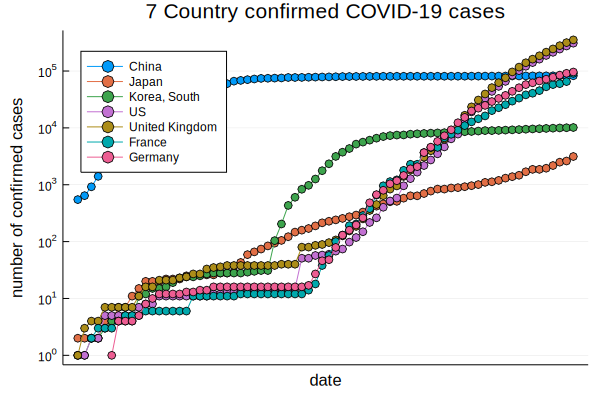

In [120]:
custom_plot(dates,float_country_data,plot(),true)

There does seem to be linearity of the countries (especially the ones besides China) on the log plot, meaning that we can loosely (since it isn't anywhere close to perfectly linear) say that there is exponential growth.

Question 1.7)

In [121]:
#convert dates to values for xlim
cur_xlims=(dates[1], dates[num_days])
@manipulate for day in slider(1:num_days, value=1)
    custom_plot(dates[1:day],country_data[:,1:day],plot(xlims = (map(Dates.value, cur_xlims))))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 74,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000111096d10, Task (runnable) @0x0000000111096d10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\"

Question 2

Question 2.1)

In [122]:
total_cases_to_date = zeros(num_days)
for day in 1:num_days
    total_cases_to_date[day] = sum(data[:,4+day])
end
new_cases = zeros(num_days)
new_cases[1:7]=total_cases_to_date[1:7]
for day in 8:num_days
    new_cases[day]=total_cases_to_date[day]-total_cases_to_date[day-7]
end

In [123]:
#make scatter plot matrix, yval is total cases - sum of cases before this week for the 7 countries
ypos = zeros(length(countries),num_days)
ypos[:,1:7] = country_data[:,1:7]
for day in 8:num_days
    ypos[:,day]=country_data[:,day].-country_data[:,day-7]
end

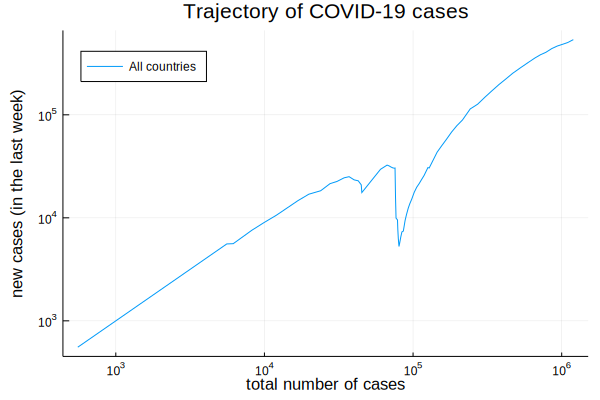

In [124]:
function custom_plot_2(total_cases_list,new_cases_list,country) 
    myP = plot()
    plot!(xticks = ticks,yticks=ticks)
    plot!(xscale=:log10,yscale=:log10)
    xlabel!("total number of cases")
    ylabel!("new cases (in the last week)")
    title!("Trajectory of COVID-19 cases")
    plot!(total_cases_list,new_cases_list,label = country,leg=:topleft)
    myP
end
custom_plot_2(total_cases_to_date,new_cases, "All countries")

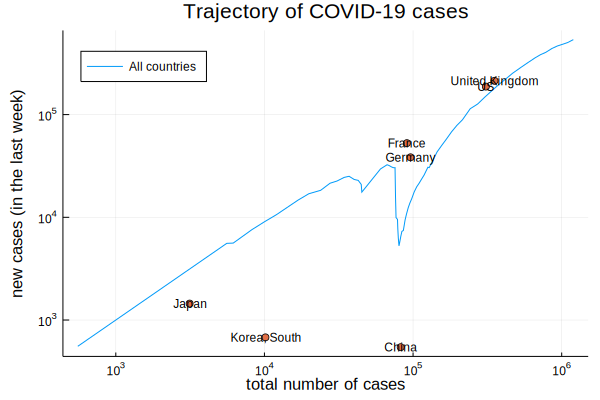

In [125]:
function scatter_and_annotate(day)
    scatter!(country_data[:,day],ypos[:,day],label=:false)
    for i in 1:length(countries)
        annotate!(country_data[i,day], ypos[i,day], text(countries[i], 8, :black))
    end
    plot!()
end
scatter_and_annotate(num_days)

In [126]:
@manipulate for day in slider(1:num_days, value=num_days)
    custom_plot_2(total_cases_to_date[1:day],new_cases[1:day])
    scatter_and_annotate(day)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 74,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
74, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001116006d0, Task (runnable) @0x00000001116006d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\

3) For the time stamps I did 514-542 on lecture 1